In [1]:
from keras import models
from keras import layers
model=models.Sequential()

Using TensorFlow backend.
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a s

In [2]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


W0808 12:08:42.219810  8384 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 12:08:42.224810  8384 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 12:08:42.246811  8384 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

W0808 12:08:42.644834  8384 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 12:08:42.653835  8384 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0808 12:08:42.661835  8384 deprecation.py:323] From c:\python3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [6]:
import os, shutil
base_dir = 'D://cats_and_dogs_small'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

In [7]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
import sys
from PIL import Image
import PIL.Image

In [9]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

W0808 12:08:48.154149  8384 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 66s 656ms/step - loss: 0.6867 - acc: 0.5490 - val_loss: 0.6647 - val_acc: 0.6270
Epoch 2/30
100/100 [==============================] - 65s 649ms/step - loss: 0.6469 - acc: 0.6230 - val_loss: 0.7172 - val_acc: 0.5540
Epoch 3/30
100/100 [==============================] - 66s 657ms/step - loss: 0.6025 - acc: 0.6800 - val_loss: 0.6150 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 70s 697ms/step - loss: 0.5648 - acc: 0.7095 - val_loss: 0.5886 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 76s 762ms/step - loss: 0.5361 - acc: 0.7220 - val_loss: 0.5819 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 76s 761ms/step - loss: 0.5109 - acc: 0.7460 - val_loss: 0.6055 - val_acc: 0.6720
Epoch 7/30
100/100 [==============================] - 77s 767ms/step - loss: 0.4705 - acc: 0.7770 - val_loss: 0.6357 - val_acc: 0.6740
Epoch 8/30
100/100 [==============================] - 6

In [10]:
model.save('cats_and_dogs_small_1.h5')

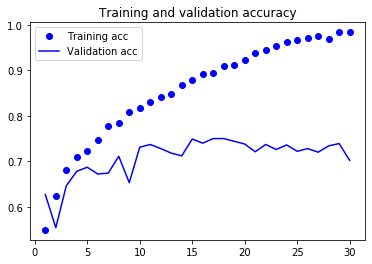

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


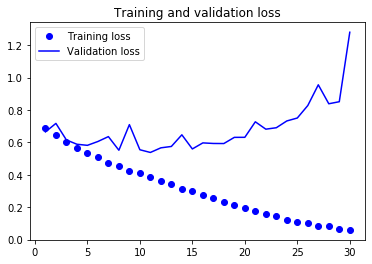

In [13]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [16]:
from keras.preprocessing import image
tarin_dir_cats=os.path.join(train_dir,'cats')

In [18]:
fnames=[os.path.join(tarin_dir_cats,fname) for fname in os.listdir(tarin_dir_cats)]
    

In [38]:
img_path = fnames[5]
img=image.load_img(img_path,target_size=(150,150))
img2=image.load_img(img_path)

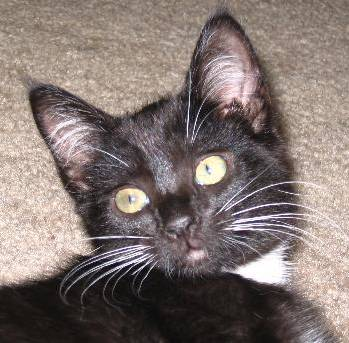

In [39]:
img2

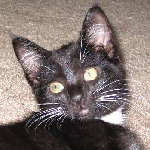

In [22]:
img

In [23]:
x= image.img_to_array(img)

In [27]:
x.shape

(150, 150, 3)

In [41]:
x

array([[[[146., 132., 119.],
         [145., 131., 118.],
         [136., 122., 109.],
         ...,
         [124., 110., 101.],
         [114., 100.,  91.],
         [126., 112., 103.]],

        [[154., 140., 127.],
         [153., 139., 126.],
         [142., 128., 115.],
         ...,
         [123., 109., 100.],
         [110.,  96.,  87.],
         [119., 105.,  96.]],

        [[151., 137., 124.],
         [158., 144., 131.],
         [144., 130., 117.],
         ...,
         [120., 106.,  97.],
         [112.,  98.,  89.],
         [110.,  96.,  87.]],

        ...,

        [[ 31.,  27.,  24.],
         [ 36.,  32.,  29.],
         [ 40.,  35.,  32.],
         ...,
         [177., 160., 144.],
         [185., 168., 152.],
         [203., 184., 169.]],

        [[ 32.,  28.,  25.],
         [ 34.,  30.,  27.],
         [ 36.,  31.,  28.],
         ...,
         [171., 154., 138.],
         [178., 161., 145.],
         [182., 163., 148.]],

        [[ 33.,  29.,  26.],
       

In [30]:
x=x.reshape((1,)+x.shape)

In [31]:
x.shape

(1, 150, 150, 3)

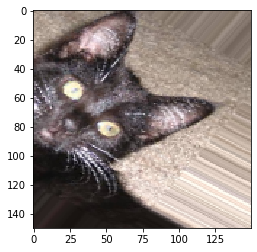

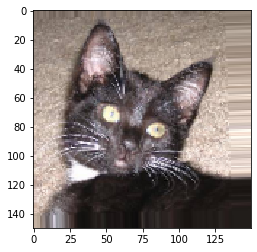

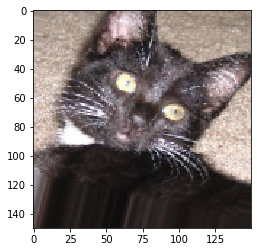

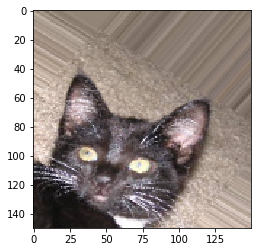

In [33]:
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4==0:
        break
plt.show()
        

In [37]:
train_gen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2)


In [42]:
train_generator=train_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [43]:
test_gen=ImageDataGenerator(rescale=1.0/255)
validation_generator=test_gen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [49]:
history=model.fit_generator(train_generator,steps_per_epoch=5,epochs=5,validation_data=validation_generator,validation_steps=20)

Epoch 1/5
5/5 [==============================] - 10s 2s/step - loss: 0.4511 - acc: 0.8000 - val_loss: 0.5416 - val_acc: 0.7305
Epoch 2/5
5/5 [==============================] - 10s 2s/step - loss: 0.6233 - acc: 0.6688 - val_loss: 0.4991 - val_acc: 0.7750
Epoch 3/5
5/5 [==============================] - 12s 2s/step - loss: 0.5265 - acc: 0.7188 - val_loss: 0.5345 - val_acc: 0.7256
Epoch 4/5
5/5 [==============================] - 12s 2s/step - loss: 0.4891 - acc: 0.7750 - val_loss: 0.5376 - val_acc: 0.7281
Epoch 5/5
5/5 [==============================] - 12s 2s/step - loss: 0.4876 - acc: 0.7313 - val_loss: 0.5150 - val_acc: 0.7419


In [50]:
model.save('cats_dogs_small_2.h5')

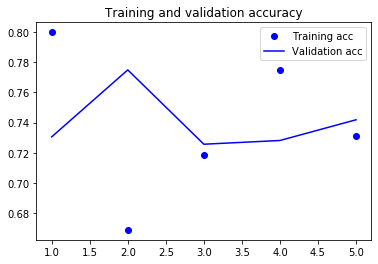

In [51]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


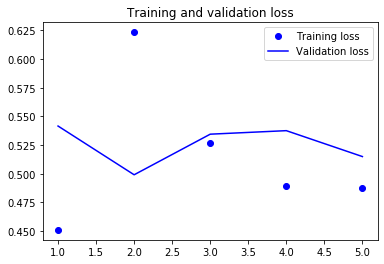

In [52]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [53]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 192s 3us/step


In [54]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [56]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'D://cats_and_dogs_small'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')
datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i * batch_size>sample_count:
            break
        return features,labels


        
    

In [57]:
train_features, train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [58]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [59]:
train_features.shape

(2000, 8192)

In [63]:
from keras import models
from keras import layers
from keras import optimizers

model= models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=8192))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6909 - acc: 0.9950 - val_loss: 0.6892 - val_acc: 0.9910
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6826 - acc: 0.9965 - val_loss: 0.6809 - val_acc: 0.9910
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6755 - acc: 0.9975 - val_loss: 0.6735 - val_acc: 0.9910
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6685 - acc: 0.9975 - val_loss: 0.6653 - val_acc: 0.9910
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6588 - acc: 0.9975 - val_loss: 0.6596 - val_acc: 0.9910
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6512 - acc: 0.9980 - val_loss: 0.6503 - val_acc: 0.9910
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6422 - acc: 0.9990 - val_loss: 0.6430 - val_acc: 0.9910
Epoch 8/30
200

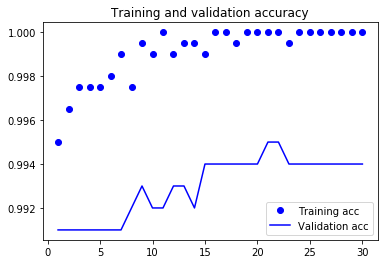

In [64]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

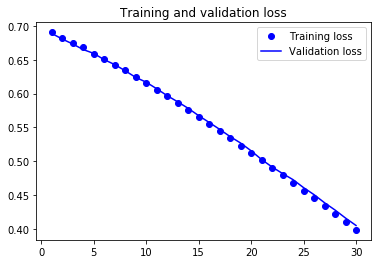

In [65]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()